#### import library

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot') # To make the visualization a little better...

In [5]:
df = pd.read_csv('Crawling.csv')
df.head()

,Player,Team,Position,Apps,Mins,Goals,Assists,YelCard,RedCard,SpG,PS,AerialsWon,MotM,Ratting
0,Lionel Messi,"PSG,",", AM(CR),FW",23,2032,13,13,-,-,4.3,82.6,-,12,8.46
1,Kylian Mbappé,"PSG,",", AM(LR),FW",22(2),1922,19,3,5,-,4.3,82.8,0.3,3,7.72
2,Martin Terrier,"Rennes,",", AM(CL),FW",16,1330,9,4,-,-,2.9,75.3,3.9,7,7.71
3,Neymar,"PSG,",", AM(CLR),FW",18(2),1553,13,11,4,1,1.9,82.7,0.1,3,7.71
4,Khvicha Kvaratskhelia,"Napoli,",", AM(CLR)",22(1),1743,12,10,-,-,2.9,81.9,0.3,7,7.64


 <ul>
        Comment: After crawling the data, some attributes need to be processed
        <ul>
        <li> The Team attribute needs to remove the comma after each club name </li>
        <li> The Position property needs to remove the first comma  </li>
        <li> The Apps attribute only takes the number of occurrences and leaves out the data in brackets for easy calculation</li>
        <li> Convert '-' to '0' </li>
        </ul>
    </ul>

In [6]:
print("Rows: ",df.shape[0])
print("Columns: ",df.shape[1])

Rows:  1550
Columns:  14


#### Processing
- Remove the comma after each club name in the dataset using the ".rstrip()" function

In [7]:
df["Team"]= df['Team'].apply(lambda x: (x.rstrip(',')))
df.head()

,Player,Team,Position,Apps,Mins,Goals,Assists,YelCard,RedCard,SpG,PS,AerialsWon,MotM,Ratting
0,Lionel Messi,PSG,", AM(CR),FW",23,2032,13,13,-,-,4.3,82.6,-,12,8.46
1,Kylian Mbappé,PSG,", AM(LR),FW",22(2),1922,19,3,5,-,4.3,82.8,0.3,3,7.72
2,Martin Terrier,Rennes,", AM(CL),FW",16,1330,9,4,-,-,2.9,75.3,3.9,7,7.71
3,Neymar,PSG,", AM(CLR),FW",18(2),1553,13,11,4,1,1.9,82.7,0.1,3,7.71
4,Khvicha Kvaratskhelia,Napoli,", AM(CLR)",22(1),1743,12,10,-,-,2.9,81.9,0.3,7,7.64


- Remove the first comma in each line of data using the ".lstrip()" function

In [8]:
df["Position"]= df['Position'].apply(lambda x: (x.lstrip(', ')))
df.head()

,Player,Team,Position,Apps,Mins,Goals,Assists,YelCard,RedCard,SpG,PS,AerialsWon,MotM,Ratting
0,Lionel Messi,PSG,"AM(CR),FW",23,2032,13,13,-,-,4.3,82.6,-,12,8.46
1,Kylian Mbappé,PSG,"AM(LR),FW",22(2),1922,19,3,5,-,4.3,82.8,0.3,3,7.72
2,Martin Terrier,Rennes,"AM(CL),FW",16,1330,9,4,-,-,2.9,75.3,3.9,7,7.71
3,Neymar,PSG,"AM(CLR),FW",18(2),1553,13,11,4,1,1.9,82.7,0.1,3,7.71
4,Khvicha Kvaratskhelia,Napoli,AM(CLR),22(1),1743,12,10,-,-,2.9,81.9,0.3,7,7.64


- Just keep number in column Apps and convert to int type

In [9]:
df["Apps"]= df['Apps'].apply(lambda x: int(x.split('(')[0]))
df.head()

,Player,Team,Position,Apps,Mins,Goals,Assists,YelCard,RedCard,SpG,PS,AerialsWon,MotM,Ratting
0,Lionel Messi,PSG,"AM(CR),FW",23,2032,13,13,-,-,4.3,82.6,-,12,8.46
1,Kylian Mbappé,PSG,"AM(LR),FW",22,1922,19,3,5,-,4.3,82.8,0.3,3,7.72
2,Martin Terrier,Rennes,"AM(CL),FW",16,1330,9,4,-,-,2.9,75.3,3.9,7,7.71
3,Neymar,PSG,"AM(CLR),FW",18,1553,13,11,4,1,1.9,82.7,0.1,3,7.71
4,Khvicha Kvaratskhelia,Napoli,AM(CLR),22,1743,12,10,-,-,2.9,81.9,0.3,7,7.64


- Convert '-' to 0 for all columns that have characters '-'

In [10]:
feature_ =['Goals','Assists','YelCard','RedCard','SpG','MotM','AerialsWon']

def delete_(df, feature_):
    for i in feature_:
        for temp in range(len(df[i])):
            if df[i][temp]=='-':
                df.loc[temp,i]= 0
delete_(df,feature_)
df.head()

,Player,Team,Position,Apps,Mins,Goals,Assists,YelCard,RedCard,SpG,PS,AerialsWon,MotM,Ratting
0,Lionel Messi,PSG,"AM(CR),FW",23,2032,13,13,0,0,4.3,82.6,0,12,8.46
1,Kylian Mbappé,PSG,"AM(LR),FW",22,1922,19,3,5,0,4.3,82.8,0.3,3,7.72
2,Martin Terrier,Rennes,"AM(CL),FW",16,1330,9,4,0,0,2.9,75.3,3.9,7,7.71
3,Neymar,PSG,"AM(CLR),FW",18,1553,13,11,4,1,1.9,82.7,0.1,3,7.71
4,Khvicha Kvaratskhelia,Napoli,AM(CLR),22,1743,12,10,0,0,2.9,81.9,0.3,7,7.64


#### Check value exception
- Unique
- Null
- Compute  Null percent
- Count duplicated values
- Check NaN  
- Check the data type of each attribute

In [11]:
_data = pd.DataFrame({
    'Unique':df.nunique(),
    'Null':df.isnull().sum(),
    'NullPercent':df.isnull().sum() / len(df),
    'Duplicated' :df.duplicated().sum(),
    'NaN':df.isna().sum(),
    'Type':df.dtypes.values
})
_data

,Unique,Null,NullPercent,Duplicated,NaN,Type
Player,1549,0,0.0,0,0,object
Team,98,0,0.0,0,0,object
Position,91,0,0.0,0,0,object
Apps,29,0,0.0,0,0,int64
Mins,1029,0,0.0,0,0,int64
Goals,21,0,0.0,0,0,object
Assists,14,0,0.0,0,0,object
YelCard,12,0,0.0,0,0,object
RedCard,4,0,0.0,0,0,object
SpG,42,0,0.0,0,0,object


 <ul>
        Comment:
        <ul>
        <li> Don't have Null values in dataset </li>
        <li> Don't have Duplicated values </li>
        <li> Convert type of the following columns : Goals, Assists, YelCard , RedCard, MotM về int và AerialsWon, SpG to float to easily  than </li>
        </ul>
    </ul>

#### Processing part 2
- Save the columns need to change the type to int to Feature variable array
- Using astype method to convert that

In [12]:
features = [ "Goals","Assists", "YelCard" ,"RedCard", "MotM"]

def convert_int_(df, features):
    for a in features:
        df[a] = df[a].astype("int")

convert_int_ (df, features)

- Gets the columns need to change the type to float
- Using astype method to convert to float

In [13]:
features_f = ['AerialsWon','SpG']
def convert_float(df, features):
    for a in features:
        df[a] = df[a].astype("float")
convert_float(df,features_f)

- Check the type of all columns

In [14]:
df.dtypes

Player         object
Team           object
Position       object
Apps            int64
Mins            int64
Goals           int32
Assists         int32
YelCard         int32
RedCard         int32
SpG           float64
PS            float64
AerialsWon    float64
MotM            int32
Ratting       float64
dtype: object

#### Describe the data

In [15]:
df.describe()

,Apps,Mins,Goals,Assists,YelCard,RedCard,SpG,PS,AerialsWon,MotM,Ratting
count,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000
mean,16.158065,1435.763226,2.021935,1.373548,2.869677,0.150968,0.851290,78.738516,0.938065,0.770968,6.636394
std,6.696996,548.555401,2.922636,1.727893,2.093624,0.400672,0.696395,8.162181,0.814021,1.200843,0.277578
min,0.000000,202.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.500000,0.000000,0.000000,6.070000
25%,11.000000,1015.000000,0.000000,0.000000,1.000000,0.000000,0.400000,74.100000,0.300000,0.000000,6.450000
50%,17.000000,1447.500000,1.000000,1.000000,3.000000,0.000000,0.700000,80.200000,0.700000,0.000000,6.605000
75%,22.000000,1859.000000,3.000000,2.000000,4.000000,0.000000,1.200000,84.675000,1.300000,1.000000,6.790000
max,28.000000,2520.000000,28.000000,13.000000,11.000000,3.000000,4.600000,95.400000,6.600000,12.000000,8.460000


#### Recheck the dataset

In [16]:
df.head(10)

,Player,Team,Position,Apps,Mins,Goals,Assists,YelCard,RedCard,SpG,PS,AerialsWon,MotM,Ratting
0,Lionel Messi,PSG,"AM(CR),FW",23,2032,13,13,0,0,4.3,82.6,0.0,12,8.46
1,Kylian Mbappé,PSG,"AM(LR),FW",22,1922,19,3,5,0,4.3,82.8,0.3,3,7.72
2,Martin Terrier,Rennes,"AM(CL),FW",16,1330,9,4,0,0,2.9,75.3,3.9,7,7.71
3,Neymar,PSG,"AM(CLR),FW",18,1553,13,11,4,1,1.9,82.7,0.1,3,7.71
4,Khvicha Kvaratskhelia,Napoli,AM(CLR),22,1743,12,10,0,0,2.9,81.9,0.3,7,7.64
5,Victor Osimhen,Napoli,FW,22,1916,21,4,4,0,4.3,71.0,2.0,4,7.60
6,Kieran Trippier,Newcastle,"D(LR),M(R)",26,2291,1,5,5,0,0.5,74.8,1.4,7,7.54
7,Erling Haaland,Man City,FW,25,2120,28,5,4,0,3.5,75.6,1.3,5,7.52
8,Jude Bellingham,Borussia Dortmund,M(CLR),23,2076,4,4,6,0,1.9,82.2,1.3,6,7.52
9,Kevin De Bruyne,Man City,"M(CLR),FW",22,1944,4,12,1,0,2.3,78.9,0.3,7,7.51


#### Check the correlation of attributes using heatmap

C:\Users\DELL\AppData\Local\Temp\ipykernel_13036\2301299441.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


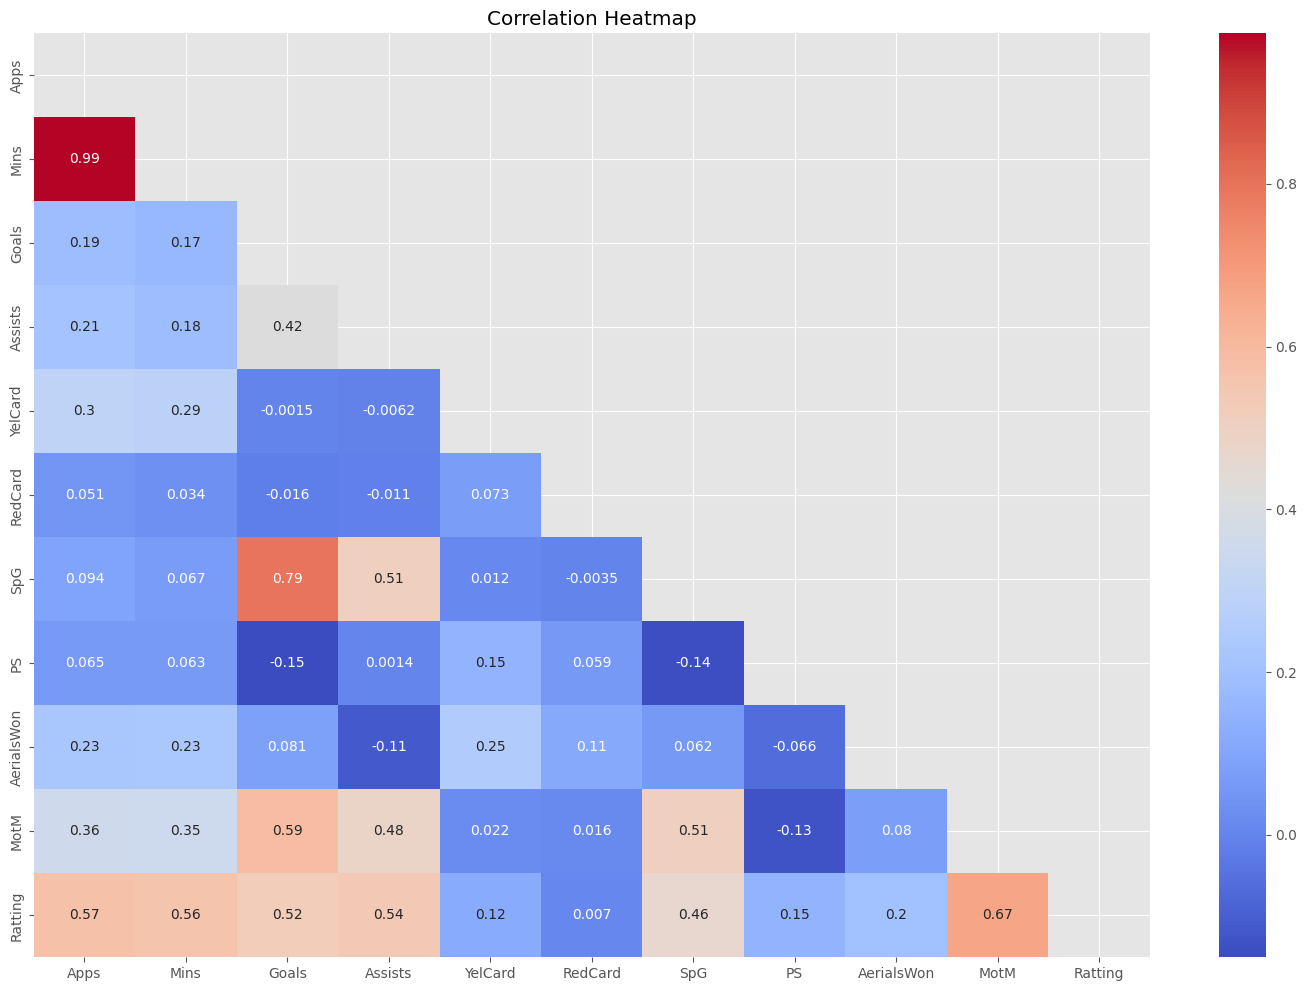

In [22]:
df_corr = df.corr()
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(18,12))
sns.heatmap(df_corr, cmap="coolwarm", annot=True, mask=mask)
plt.title("Correlation Heatmap")
plt.show();

#### Save to new file 

In [18]:
df.to_csv("Data_Cleaned.csv", index = False)